In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df=df.drop(labels=['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [6]:
x=df.iloc[:,:-1]
y=df['Exited']

In [7]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
label1=LabelEncoder()
x['Geography']=label1.fit_transform(x['Geography'])

In [11]:
x.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10
5,645,2,Male,44,8,113755.78,2,1,0,149756.71
6,822,0,Male,50,7,0.00,2,1,1,10062.80
7,376,1,Female,29,4,115046.74,4,1,0,119346.88
8,501,0,Male,44,4,142051.07,2,0,1,74940.50
9,684,0,Male,27,2,134603.88,1,1,1,71725.73


In [12]:
label=LabelEncoder()
x['Gender']=label.fit_transform(x['Gender'])

In [13]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [14]:
x=pd.get_dummies(x,drop_first='True',columns=['Geography'])

In [15]:
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [16]:
#standard scaler
from sklearn.preprocessing import StandardScaler

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1,stratify=y)

In [18]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [19]:
model=Sequential()
model.add(Dense(x_train.shape[1],activation='relu',input_dim=x_train.shape[1]))
#model.add(Dense(32,activation='relu'))

model.add(Dense(128,activation='relu'))
#model.add(Dense(256,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [20]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
x_train=np.asarray(x_train)
x_test=np.asarray(x_test)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history=model.fit(x_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(x_test,y_test))

W0425 01:44:02.580826  1084 deprecation.py:323] From C:\Users\satish\Anaconda3\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 3s 413us/sample - loss: 0.4431 - accuracy: 0.8114 - val_loss: 0.3908 - val_accuracy: 0.8330
Epoch 2/10
8000/8000 [==============================] - 2s 232us/sample - loss: 0.3696 - accuracy: 0.8480 - val_loss: 0.3660 - val_accuracy: 0.8540
Epoch 3/10
8000/8000 [==============================] - 2s 221us/sample - loss: 0.3499 - accuracy: 0.8555 - val_loss: 0.3607 - val_accuracy: 0.8545
Epoch 4/10
8000/8000 [==============================] - 2s 237us/sample - loss: 0.3453 - accuracy: 0.8579 - val_loss: 0.3527 - val_accuracy: 0.8595
Epoch 5/10
8000/8000 [==============================] - 2s 236us/sample - loss: 0.3410 - accuracy: 0.8600 - val_loss: 0.3609 - val_accuracy: 0.8515
Epoch 6/10
8000/8000 [==============================] - 2s 241us/sample - loss: 0.3377 - accuracy: 0.8610 - val_loss: 0.3567 - val_accuracy: 0.8530
Epoch 7/10
8000/8000 [==============================] - 2s 239us

In [23]:
def plot_learningCurve(history, epochs):
    

    # Plot training & validation accuracy
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values\n",
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

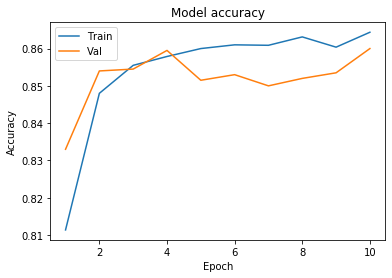

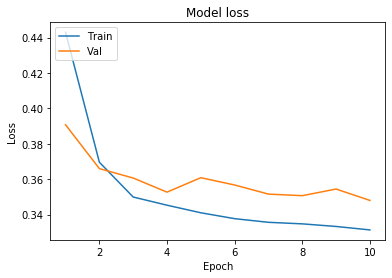

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_learningCurve(history, 10)

In [25]:
y_pred=model.predict_classes(x_test)

In [26]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [27]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [28]:
model.evaluate(x_test,y_test)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3480161545276642, 0.86]

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [30]:
confusion_matrix(y_test,y_pred)

array([[1529,   64],
       [ 216,  191]], dtype=int64)

In [31]:
accuracy_score(y_test,y_pred)

0.86